<a href="https://colab.research.google.com/github/Tyler9937/DS-Unit-1-Sprint-2-Statistics/blob/master/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [1]:
# TODO - your code!
#importing libraries
from scipy import stats
import pandas as pd
import numpy as np

#loading in csv
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'], header=None)

#cleaning the data further

#using .replace() to swap ? to nan values and n/ys to 0/1s
df = df.replace({'?':np.NaN, 'n':0, 'y':1})

#dropping nan values from the dataframe
'''
should be noted that there are other ways to do this based on the situation
it may in other cases be better to us .isnan() in a function to target 
specific nan values from a dataframe rather than dropping all nan values
'''
df = df.dropna()

#subsetting the dataframe into two new subsets reps and dems
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']


df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
19,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [0]:
#Creating a fuction that returns a 95% confidence invterval of the given data
def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof=1)/np.sqrt(n)
  moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n-1)
  return (mean - moe,mean,mean + moe)

In [19]:
#applying a df column to the new function to see the CI
#note: this may differ based on how NaN values are delt with
confidence_interval(rep['water-project'])

(0.3765480931771919, 0.4722222222222222, 0.5678963512672525)

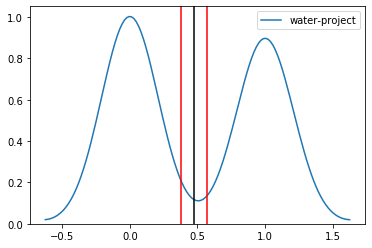

In [4]:
#importing usful data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#plots the distrubution line of the given df column
sns.kdeplot(rep['water-project'])

#setting the confidence interval to CI
CI = confidence_interval(rep['water-project'])

#ploting lines that our CI function returns
plt.axvline(x=CI[0], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[1], color='k')

In [5]:
#importing the loans df csv from a previous class
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
!unzip LoanStats_2018Q4.csv.zip
!head LoanStats_2018Q4.csv

--2019-11-06 03:11:00--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                 <=>]  21.67M   882KB/s    in 26s     

2019-11-06 03:11:26 (869 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22727580]

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    
Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","

In [6]:
#importing Pandas library
import pandas as pd

#lets us see desired rows and columns
pd.options.display.max_rows = 999
pd.options.display.max_columns = 100

#Using pandas to create the dataframe
#Data Cleaning:
#1. For header we skip line one
#2. For the footer we ignore the bottom two lines
#3. and we are using the python engine instead of c engine because
#pandas does not have fully c engine support yet
df = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2, engine='python')

#Have to use print function becasue only last command is read in cells
#returns the rows and columns of the dataframe
print(df.shape)

#Chaining the head() method to dataframe. Returns the top 5 rows
df.head()

(128412, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,35000,35000,35000.0,36 months,14.47%,1204.23,C,C2,Staff Physician,8 years,MORTGAGE,360000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,336xx,FL,19.90,0,Apr-1995,1,NaN,NaN,24,0,57259,43.2%,51,w,0.00,0.00,38187.046837,38187.05,35000.00,3187.05,0.0,0.0,0.0,Aug-2019,29882.16,NaN,Sep-2019,0,...,23,16,24,11,24,0.0,0,0,5,100.0,30.8,0,0,1222051,169286,124600,258401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,5000,5000,5000.0,36 months,22.35%,191.86,D,D5,Director of Sales,10+ years,MORTGAGE,72000.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,333xx,FL,20.12,0,Mar-2010,0,NaN,NaN,13,0,11720,47.1%,26,f,0.00,0.00,5615.977674,5615.98,5000.00,615.98,0.0,0.0,0.0,Jul-2019,4474.13,NaN,Aug-2019,0,...,4,11,17,11,13,0.0,0,0,1,100.0,50.0,0,0,218686,34418,18200,37786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,10000,10000,10000.0,60 months,23.40%,284.21,E,E1,NaN,< 1 year,RENT,55000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,902xx,CA,13.51,0,Apr-2007,0,44.0,88.0,9,1,11859,53.9%,11,w,9131.55,9131.55,2538.390000,2538.39,868.45,1669.94,0.0,0.0,0.0,Sep-2019,284.21,Oct-2019,Oct-2019,0,...,2,8,9,7,9,0.0,0,0,0,90.9,100.0,1,0,34386,21235,10500,12386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,17100,17100,17100.0,36 months,18.94%,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,13682.21,13682.21,5609.710000,5609.71,3417.79,2191.92,0.0,0.0,0.0,Sep-2019,626.30,Oct-2019,Oct-2019,0,...,5,12,14,9,14,NaN,0,0,2,95.0,75.0,0,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4000,4000,4000.0,36 months,10.72%,130.43,B,B2,Extrusion assistant,10+ years,MORTGAGE,56000.0,Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,301xx,GA,31.03,0,Sep-2006,0,NaN,NaN,7,0,4518,28.6%,11,w,3116.62,3116.62,1160.780000,1160.78,883.38,277.40,0.0,0.0,0.0,Sep-2019,

In [7]:
#Creating cut points and labels to make our data catagorical
cut_points= [0,10000,20000,30000,40000,50000]
label_names = ['0-10000','-20000','-30000','-40000','-50000']

#creating a new column based on edited data
df['total_payments_in_ranges'] = pd.cut(df['total_pymnt'], cut_points, labels=label_names)

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,total_payments_in_ranges
0,NaN,NaN,35000,35000,35000.0,36 months,14.47%,1204.23,C,C2,Staff Physician,8 years,MORTGAGE,360000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,336xx,FL,19.90,0,Apr-1995,1,NaN,NaN,24,0,57259,43.2%,51,w,0.00,0.00,38187.046837,38187.05,35000.00,3187.05,0.0,0.0,0.0,Aug-2019,29882.16,NaN,Sep-2019,0,...,16,24,11,24,0.0,0,0,5,100.0,30.8,0,0,1222051,169286,124600,258401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,-40000
1,NaN,NaN,5000,5000,5000.0,36 months,22.35%,191.86,D,D5,Director of Sales,10+ years,MORTGAGE,72000.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,333xx,FL,20.12,0,Mar-2010,0,NaN,NaN,13,0,11720,47.1%,26,f,0.00,0.00,5615.977674,5615.98,5000.00,615.98,0.0,0.0,0.0,Jul-2019,4474.13,NaN,Aug-2019,0,...,11,17,11,13,0.0,0,0,1,100.0,50.0,0,0,218686,34418,18200,37786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,0-10000
2,NaN,NaN,10000,10000,10000.0,60 months,23.40%,284.21,E,E1,NaN,< 1 year,RENT,55000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,902xx,CA,13.51,0,Apr-2007,0,44.0,88.0,9,1,11859,53.9%,11,w,9131.55,9131.55,2538.390000,2538.39,868.45,1669.94,0.0,0.0,0.0,Sep-2019,284.21,Oct-2019,Oct-2019,0,...,8,9,7,9,0.0,0,0,0,90.9,100.0,1,0,34386,21235,10500,12386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,0-10000
3,NaN,NaN,17100,17100,17100.0,36 months,18.94%,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,13682.21,13682.21,5609.710000,5609.71,3417.79,2191.92,0.0,0.0,0.0,Sep-2019,626.30,Oct-2019,Oct-2019,0,...,12,14,9,14,NaN,0,0,2,95.0,75.0,0,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,0-10000
4,NaN,NaN,4000,4000,4000.0,36 months,10.72%,130.43,B,B2,Extrusion assistant,10+ years,MORTGAGE,56000.0,Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,301xx,GA,31.03,0,Sep-2006,0,NaN,NaN,7,0,4518,28.6%,11,w,3116.62,3116.62,1160.780000,1160.7

In [8]:
#creating a crosstab of two columns from the df
observed = pd.crosstab(df['home_ownership'], df['total_payments_in_ranges'])

observed

total_payments_in_ranges,0-10000,-20000,-30000,-40000,-50000
home_ownership,,,,,
ANY,310,17,5,1,0
MORTGAGE,52130,8073,1847,984,425
OWN,12146,1360,283,138,45
RENT,44786,4529,799,346,99


In [9]:
#importing usful library
from scipy import stats

#using the scipy one line of code to make a table of expected values
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 1103.3519718987645
P-value: 1.104967490072597e-228
Degrees of Freedom: 12
Expected: 
 [[2.83821887e+02 3.62757027e+01 7.61377150e+00 3.81207578e+00
  1.47656305e+00]
 [5.40872466e+04 6.91297243e+03 1.45093791e+03 7.26458008e+02
  2.81385028e+02]
 [1.19085868e+04 1.52205441e+03 3.19458304e+02 1.59946915e+02
  6.19535703e+01]
 [4.30923447e+04 5.50769746e+03 1.15599001e+03 5.78783001e+02
  2.24184838e+02]]


In [10]:
#using Numpy to calculate the expected values
#creating a crosstab
contingency_table = pd.crosstab(df['home_ownership'], df['total_payments_in_ranges'], margins=True,)
contingency_table

total_payments_in_ranges,0-10000,-20000,-30000,-40000,-50000,All
home_ownership,,,,,,
ANY,310,17,5,1,0,333
MORTGAGE,52130,8073,1847,984,425,63459
OWN,12146,1360,283,138,45,13972
RENT,44786,4529,799,346,99,50559
All,109372,13979,2934,1469,569,128323


In [11]:
#next four cells are creating vars for each type of home ownership
#makes an array of each count in each othe the total payment ranges
anycount = contingency_table.iloc[0][0:5].values
anycount

array([310,  17,   5,   1,   0])

In [12]:
mortgagecount = contingency_table.iloc[1][0:5].values
mortgagecount

array([52130,  8073,  1847,   984,   425])

In [13]:
owncount = contingency_table.iloc[2][0:5].values
owncount

array([12146,  1360,   283,   138,    45])

In [14]:
rentcount = contingency_table.iloc[3][0:5].values
rentcount

array([44786,  4529,   799,   346,    99])

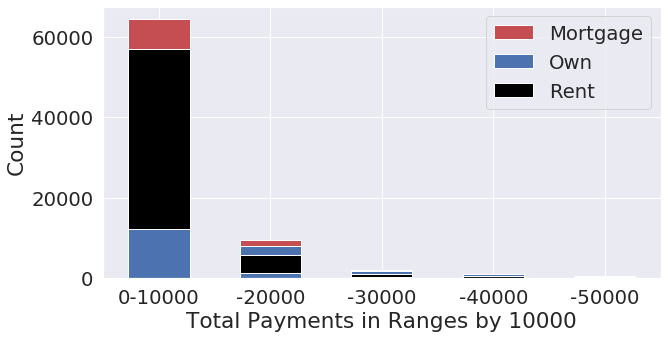

In [15]:
#diagram aims to visually show the distrubtion of counts
#note: categories could be adjusted to better fit the data for analysist purposes
fig = plt.figure(figsize=(10,5))
sns.set(font_scale=1.8)
categories = ['0-10000','-20000','-30000','-40000','-50000']
p1 = plt.bar(categories, mortgagecount, 0.55, color='b')
p2 = plt.bar(categories, owncount, 0.55, bottom=mortgagecount, color='r')
p3 = plt.bar(categories, rentcount, 0.55, bottom=owncount,color='black')
plt.legend((p2[0], p1[0], p3[0]), ('Mortgage', 'Own','Rent'))
plt.xlabel('Total Payments in Ranges by 10000')
plt.ylabel('Count')
plt.show()

In [16]:
#creating a list of row and col sums
row_sums = contingency_table.iloc[0:4, 5].values
col_sums = contingency_table.iloc[4, 0:5].values

print(row_sums)
print(col_sums)

[  333 63459 13972 50559]
[109372  13979   2934   1469    569]


In [17]:
#pulling the sample sizes from the crosstab
total = contingency_table.loc['All','All']
total

128323

In [18]:
#using a for loop and empty lists to calculate the expected values
#logic used is based of of statistical formulas
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)

#the table of expected values is printed and does match the scipy results.
print(expected.shape)  
print(expected)

(4, 5)
[[2.83821887e+02 3.62757027e+01 7.61377150e+00 3.81207578e+00
  1.47656305e+00]
 [5.40872466e+04 6.91297243e+03 1.45093791e+03 7.26458008e+02
  2.81385028e+02]
 [1.19085868e+04 1.52205441e+03 3.19458304e+02 1.59946915e+02
  6.19535703e+01]
 [4.30923447e+04 5.50769746e+03 1.15599001e+03 5.78783001e+02
  2.24184838e+02]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)